In [1]:
import math
from scipy.interpolate import interp1d
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def alfa(awa,sa):
    alfa = awa-sa
    if alfa > 180:
        alfa = alfa % -180
    elif alfa < -180:
        alfa = alfa % 180
    return alfa

In [3]:
alpha = alfa(-90,100)
print(alpha)

170


In [9]:
udim = 180
ldim = -180
X, Y = np.mgrid[ldim:udim, -90:90]
Z = np.zeros([udim*2,udim])

for awa in range(ldim,udim):
    print(awa)
    for sa in range(-90,90):
        rho = 1.225 # kg/m^3
        v = 5 # m/s

        h1 = 1333.33/1000 #[m] höjd för del 1
        c1 = (878.25+807.29)/2000 #[m]Korda för del 1
        h2 = 666.67/1000 #[m] höjd för del 2
        c2 = (757.11+640.50)/2000 #[m] Korda för del 2
        h3 = 666.67/1000 #[m] höjd för del 3
        c3 = (586.67+319.8)/2000 #[m] Korda för del 3

        alpha = alfa(awa,sa)

        # alfa,cl,cd cm
        clcdcm = np.array([[0, 0, 0.0026, 0],
        [1,    0.0996,    0.0039,    0],
        [2,    0.2010,    0.0052,    0],
        [3,    0.3039,    0.0066,    0],
        [4,    0.4083,    0.0080,    0],
        [5,    0.5141,    0.0094,    0],
        [6,    0.6252,    0.0109,    0.0000],
        [7,    0.7371,    0.0123,    0.0100],
        [8,    0.8397,    0.0138,    0.0150],
        [9,    0.9320,    0.0154,    0.0150],
        [10,    1.0188,    0.0174,    0.0300],
        [11,    1.1045,    0.0197,    0.0320],
        [12,    1.1827,    0.0221,    0.0330],
        [13,    1.2499,    0.0248,    0.0350],
        [14,    1.2946,    0.0282,    0.0400],
        [15,    1.3045,    0.0322,    0.0500],
        [16,    1.3101,    0.0373,    0.0200],
        [17,    1.3118,    0.0435,    0.0150],
        [18,    1.3119,    0.0513,    0.0100],
        [19,    1.3119,    0.0680,    0.0050],
        [20,    1.3119,    0.1000,         0],
        [21,    1.2969,    0.2256,   -0.0250],
        [22,    1.2647,    0.3135,   -0.0500],
        [23,    1.2130,    0.3613,   -0.0533],
        [24,    1.1530,    0.3988,   -0.0567],
        [25,    1.0971,    0.4292,   -0.0600],
        [26,    1.0394,    0.4555,   -0.0760],
        [27,    0.9732,    0.4812,   -0.0920],
        [28,    0.9151,    0.5092,   -0.1080],
        [29,    0.8795,    0.5425,   -0.1240],
        [30,    0.8699,    0.5777,   -0.1400],
        [35,    0.9667,    0.7549,   -0.1500],
        [40,    1.0380,    0.9162,   -0.1600],
        [45,    1.0503,    1.0657,   -0.1600],
        [50,    1.0267,    1.2064,   -0.2600],
        [55,    0.9744,    1.3410,   -0.0500],
        [60,    0.8908,    1.4705,   -0.2700],
        [65,    0.7665,    1.5773,   -0.1500],
        [70,    0.6417,    1.6660,   -0.4000],
        [75,    0.5126,    1.7387,   -0.3000],
        [80,    0.3763,    1.7814,   -0.2000],
        [85,    0.2367,    1.7998,   -0.4000],
        [90,    0.0961,    1.8043,   -0.4500],
        [95,    0.0431,    1.7906,   -0.4200], 
        [100,   0.1820,    1.7642,   -0.4500],
        [105,   0.3167,    1.7114,   -0.4500],
        [110,   0.4421,    1.6471,   -0.2000],
        [115,   0.5591,    1.5679,   -0.4000],
        [120,   0.6714,    1.4745,   -0.5500],
        [125,   0.7695,    1.3653,   -0.5000],
        [130,   0.8413,    1.2408,   -0.5000],
        [135,   0.9382,    1.0995,   -0.5400],
        [140,   0.9777,    0.9406,   -0.4700],
        [145,   0.9165,    0.7655,   -0.4000],
        [150,   0.7731,    0.5921,   -0.4000],
        [155,   0.6644,    0.4428,   -0.3200],
        [160,   0.6400,    0.3323,   -0.3000],
        [165,   0.6805,    0.2363,   -0.3500],
        [170,   0.8460,    0.1533,   -0.4200],
        [175,   0.6705,    0.0648,   -0.3000],
        [180,         0,    0.0311,         0]])

        tmp1 = interp1d(clcdcm[:,0],clcdcm[:,1],kind='cubic')
        tmp2 = interp1d(clcdcm[:,0],clcdcm[:,2],kind='cubic')
        tmp3 = interp1d(clcdcm[:,0],clcdcm[:,3],kind='cubic')

        cl = tmp1(abs(alpha))
        cd = tmp2(abs(alpha))
        cm = tmp3(abs(alpha))

        # Lift
        L1 = 1/2*rho*v**2*c1*h1*cl
        L2 = 1/2*rho*v**2*c2*h2*cl
        L3 = 1/2*rho*v**2*c3*h3*cl
        L = L1 + L2 + L3

        # Drag
        D1 = 1/2*rho*v**2*c1*h1*cd
        D2 = 1/2*rho*v**2*c2*h2*cd
        D3 = 1/2*rho*v**2*c3*h3*cd
        D = D1 + D2 + D3

        if 0 <= alpha and alpha <= 90:
            Lx = L*math.cos(math.radians(awa-90))
        elif 90 < alpha and alpha <= 180:
            Lx = L*math.cos(math.radians(awa+90))
        elif -180 <= alpha and alpha <= -90:
            Lx = L*math.cos(math.radians(awa-90))
        elif -90 < alpha and alpha < 0:
            Lx = L*math.cos(math.radians(awa+90))
    
        Dx = D*(math.cos(math.radians(awa+180)))
        
        Z[awa+180,sa+90] = Dx + Lx
        
        

-180
-179
-178
-177
-176
-175
-174
-173
-172
-171
-170
-169
-168
-167
-166
-165
-164
-163
-162
-161
-160
-159
-158
-157
-156
-155
-154
-153
-152
-151
-150
-149
-148
-147
-146
-145
-144
-143
-142
-141
-140
-139
-138
-137
-136
-135
-134
-133
-132
-131
-130
-129
-128
-127
-126
-125
-124
-123
-122
-121
-120
-119
-118
-117
-116
-115
-114
-113
-112
-111
-110
-109
-108
-107
-106
-105
-104
-103
-102
-101
-100
-99
-98
-97
-96
-95
-94
-93
-92
-91
-90
-89
-88
-87
-86
-85
-84
-83
-82
-81
-80
-79
-78
-77
-76
-75
-74
-73
-72
-71
-70
-69
-68
-67
-66
-65
-64
-63
-62
-61
-60
-59
-58
-57
-56
-55
-54
-53
-52
-51
-50
-49
-48
-47
-46
-45
-44
-43
-42
-41
-40
-39
-38
-37
-36
-35
-34
-33
-32
-31
-30
-29
-28
-27
-26
-25
-24
-23
-22
-21
-20
-19
-18
-17
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72

<IPython.core.display.Javascript object>


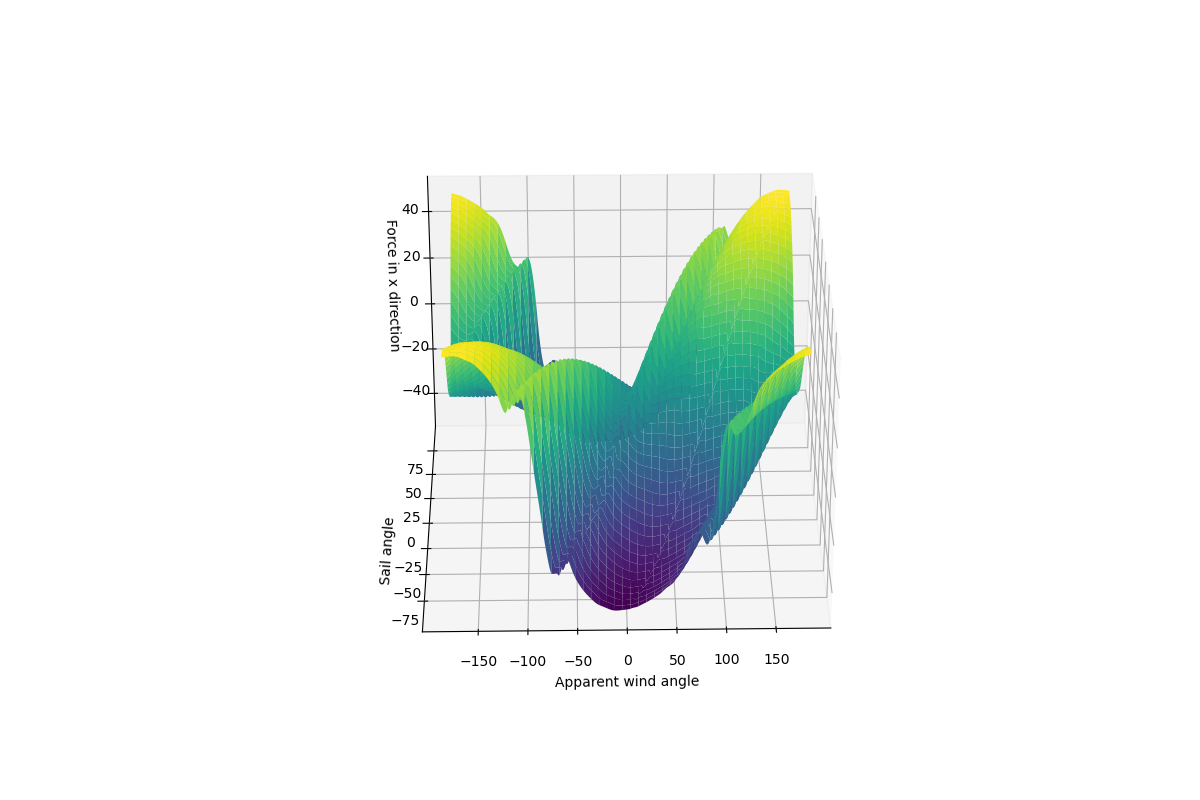

Text(0.5, 0, 'Force in x direction')

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Apparent wind angle')
ax.set_ylabel('Sail angle')
ax.set_zlabel('Force in x direction')